In [1]:
#Mounting the google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

Reading the File

In [3]:
fmw = pd.read_csv("/content/drive/My Drive/Estate/melb_data.csv")
fmw.head()

Suburb           Address  ...             Regionname Propertycount
0  Abbotsford      85 Turner St  ...  Northern Metropolitan        4019.0
1  Abbotsford   25 Bloomburg St  ...  Northern Metropolitan        4019.0
2  Abbotsford      5 Charles St  ...  Northern Metropolitan        4019.0
3  Abbotsford  40 Federation La  ...  Northern Metropolitan        4019.0
4  Abbotsford       55a Park St  ...  Northern Metropolitan        4019.0

[5 rows x 21 columns]

<h1 style="allign:center">Data Preprocessing <h1>

In [4]:
fmw.shape

(13580, 21)

Drop the unrequired data attributes, which were a noise

In [5]:
fmw1=fmw.drop(['Method','Landsize','Rooms','Type','Address','SellerG','Date','Distance','Postcode','YearBuilt','CouncilArea','Lattitude','Longtitude','Propertycount','Regionname'],axis=1)
fmw1.head()

Suburb      Price  Bedroom2  Bathroom  Car  BuildingArea
0  Abbotsford  1480000.0       2.0       1.0  1.0           NaN
1  Abbotsford  1035000.0       2.0       1.0  0.0          79.0
2  Abbotsford  1465000.0       3.0       2.0  0.0         150.0
3  Abbotsford   850000.0       3.0       2.0  1.0           NaN
4  Abbotsford  1600000.0       3.0       1.0  2.0         142.0

Name of the Various Unique Suburbs Around Melbourne(Total:314)

In [6]:
fmw1.Suburb.unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [7]:
fmw1.groupby('Suburb')['Suburb'].agg('count')

Suburb
Abbotsford       56
Aberfeldie       44
Airport West     67
Albanvale         6
Albert Park      69
               ... 
Wonga Park        1
Wyndham Vale      4
Yallambie        24
Yarra Glen        1
Yarraville      164
Name: Suburb, Length: 314, dtype: int64

Removing The Null Values

In [8]:
fmw1.isnull().sum()

Suburb             0
Price              0
Bedroom2           0
Bathroom           0
Car               62
BuildingArea    6450
dtype: int64

In [9]:
fmw2 = fmw1.dropna()
print(fmw2.isnull().sum())
print("New Shape", fmw2.shape)

Suburb          0
Price           0
Bedroom2        0
Bathroom        0
Car             0
BuildingArea    0
dtype: int64
New Shape (7101, 6)


In [10]:
fmw2.head()

Suburb      Price  Bedroom2  Bathroom  Car  BuildingArea
1  Abbotsford  1035000.0       2.0       1.0  0.0          79.0
2  Abbotsford  1465000.0       3.0       2.0  0.0         150.0
4  Abbotsford  1600000.0       3.0       1.0  2.0         142.0
6  Abbotsford  1876000.0       4.0       2.0  0.0         210.0
7  Abbotsford  1636000.0       2.0       1.0  2.0         107.0

Download The New CSV File After The Data Preprocessing 

In [ ]:
fmw2.to_csv('New_Melb.csv')
from google.colab import files
files.download("New_Melb.csv")

<h1> Data Cleansing<h1>

In [11]:
df=fmw2.copy()
df.head()

Suburb      Price  Bedroom2  Bathroom  Car  BuildingArea
1  Abbotsford  1035000.0       2.0       1.0  0.0          79.0
2  Abbotsford  1465000.0       3.0       2.0  0.0         150.0
4  Abbotsford  1600000.0       3.0       1.0  2.0         142.0
6  Abbotsford  1876000.0       4.0       2.0  0.0         210.0
7  Abbotsford  1636000.0       2.0       1.0  2.0         107.0

In [12]:
df.Bedroom2.unique() 

array([2., 3., 4., 1., 6., 5., 9., 0., 7., 8.])

In [ ]:
df.pivot_table(index=['Bedroom2'], aggfunc='size')

Bedroom2
0.0       5
1.0     356
2.0    1910
3.0    2964
4.0    1494
5.0     328
6.0      35
7.0       4
8.0       2
9.0       3
dtype: int64

Removing The Outliers In The Bedroom

In [ ]:
df1=df[(df.Bedroom2 != 0) & (df.Bedroom2 != 8) & (df.Bedroom2 != 9) ]

In [ ]:
df1.pivot_table(index=['Bedroom2'], aggfunc='size')

Bedroom2
1.0     356
2.0    1910
3.0    2964
4.0    1494
5.0     328
6.0      35
7.0       4
dtype: int64

In [ ]:
df1.Bedroom2.unique()

array([2., 3., 4., 1., 6., 5., 7.])

In [ ]:
df1.Bedroom2.describe()

count    7091.000000
mean        2.950501
std         0.957608
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: Bedroom2, dtype: float64

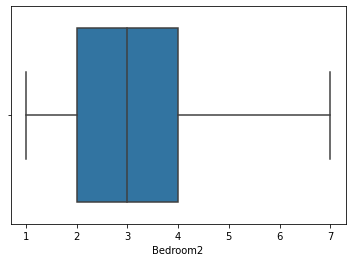

In [ ]:
# 0<Room<7
import seaborn as sns
sns.boxplot(x=df1['Bedroom2'])

Removing The Outliers In The Bathroom

In [ ]:
df.Bathroom.unique()

array([1., 2., 3., 4., 7., 5., 6., 8.])

In [ ]:
df.Bathroom.describe()

count    7101.000000
mean        1.601183
std         0.720969
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Bathroom, dtype: float64

In [ ]:
df.pivot_table(index=['Bathroom'], aggfunc='size')

Bathroom
1.0    3637
2.0    2797
3.0     566
4.0      74
5.0      20
6.0       5
7.0       1
8.0       1
dtype: int64

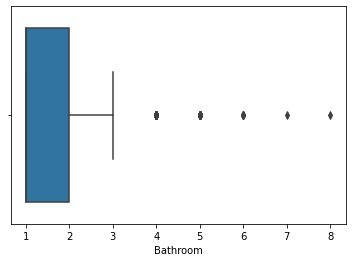

In [ ]:
# 1<BathroomRoom<3
import seaborn as sns
sns.boxplot(x=df['Bathroom'])

In [ ]:
df1=df[(df.Bathroom != 4) & (df.Bathroom != 5) & (df.Bathroom != 6) & (df.Bathroom != 7) & (df.Bathroom != 8)   ]

In [ ]:
df1.pivot_table(index=['Bathroom'], aggfunc='size')

Bathroom
1.0    3637
2.0    2797
3.0     566
dtype: int64

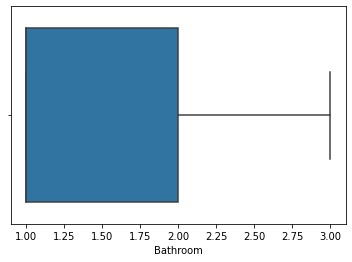

In [ ]:
# 1<BathroomRoom<3
import seaborn as sns
sns.boxplot(x=df1['Bathroom'])

Removing The Outliers In The Garage Space For The Car

In [ ]:
df1.Car.unique()

array([ 0.,  2.,  1.,  6.,  5.,  4.,  3.,  8.,  7.,  9., 10.])

In [ ]:
df1.Car.describe()

count    7000.000000
mean        1.595143
std         0.932394
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        10.000000
Name: Car, dtype: float64

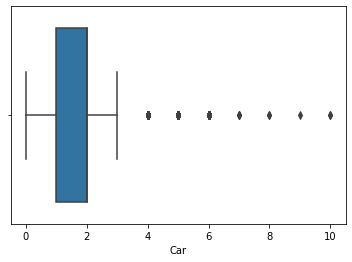

In [ ]:
import seaborn as sns
sns.boxplot(x=df1['Car'])

In [ ]:
df1=df[(df.Car != 4) & (df.Car != 5) & (df.Car != 6)& (df.Car != 7) & (df.Car != 8) & (df.Car != 9) & (df.Car != 10)   ]

After Data Preprocessing And Cleansing, We are left with 6771 values for the Data ML Model

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6771 entries, 0 to 7100
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6771 non-null   int64  
 1   Suburb        6771 non-null   object 
 2   Price         6771 non-null   float64
 3   Bedroom2      6771 non-null   float64
 4   Bathroom      6771 non-null   float64
 5   Car           6771 non-null   float64
 6   BuildingArea  6771 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 423.2+ KB


Finding The Value Of Price Per Square Metre For All The Locations Mentioned In The Data

In [ ]:
df1['price_per_sqm'] = df1['Price']/df1['BuildingArea']
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Unnamed: 0      Suburb      Price  ...  Car  BuildingArea  price_per_sqm
0           1  Abbotsford  1035000.0  ...  0.0          79.0   13101.265823
1           2  Abbotsford  1465000.0  ...  0.0         150.0    9766.666667
2           4  Abbotsford  1600000.0  ...  2.0         142.0   11267.605634
3           6  Abbotsford  1876000.0  ...  0.0         210.0    8933.333333
4           7  Abbotsford  1636000.0  ...  2.0         107.0   15289.719626

[5 rows x 8 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6771 entries, 0 to 7100
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6771 non-null   int64  
 1   Suburb         6771 non-null   object 
 2   Price          6771 non-null   float64
 3   Bedroom2       6771 non-null   float64
 4   Bathroom       6771 non-null   float64
 5   Car            6771 non-null   float64
 6   BuildingArea   6771 non-null   float64
 7   price_per_sqm  6771 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 476.1+ KB


In [ ]:
len(df1['Suburb'].unique())

297

Preparing The Data For Distribution Into Train and Test Datasets

In [ ]:
df1.Suburb = df1.Suburb.apply(lambda x: x.strip())

location = df1.groupby("Suburb")['Suburb'].agg('count').sort_values(ascending = False)
location

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Suburb
Reservoir             161
Richmond              146
Brunswick             130
Bentleigh East        119
Coburg                109
                     ... 
Warrandyte              1
Montrose                1
Beaconsfield Upper      1
Beaconsfield            1
Seabrook                1
Name: Suburb, Length: 297, dtype: int64

In [ ]:
len(location[location<=5])

101

In [ ]:
other_loc = location[location<=5]
other_loc

Suburb
Westmeadows           5
Wheelers Hill         5
Caroline Springs      5
Burnley               5
Brooklyn              5
                     ..
Warrandyte            1
Montrose              1
Beaconsfield Upper    1
Beaconsfield          1
Seabrook              1
Name: Suburb, Length: 101, dtype: int64

In [ ]:
df2=df1.copy()

In [ ]:
df2.Suburb = df2.Suburb.apply(lambda x: 'other 'if x in other_loc else x)
print(len(df2.Suburb.unique()))
df2.head(10)

197


Unnamed: 0      Suburb      Price  ...  Car  BuildingArea  price_per_sqm
0           1  Abbotsford  1035000.0  ...  0.0          79.0   13101.265823
1           2  Abbotsford  1465000.0  ...  0.0         150.0    9766.666667
2           4  Abbotsford  1600000.0  ...  2.0         142.0   11267.605634
3           6  Abbotsford  1876000.0  ...  0.0         210.0    8933.333333
4           7  Abbotsford  1636000.0  ...  2.0         107.0   15289.719626
5           9  Abbotsford  1097000.0  ...  2.0          75.0   14626.666667
6          11  Abbotsford  1350000.0  ...  2.0         190.0    7105.263158
7          12  Abbotsford   750000.0  ...  1.0          94.0    7978.723404
8          15  Abbotsford  1310000.0  ...  2.0          97.0   13505.154639
9          16  Abbotsford  1200000.0  ...  1.0         110.0   10909.090909

[10 rows x 8 columns]

In [ ]:
df2.Suburb = df2.Suburb.apply(lambda x: x.strip())

df2.groupby("Suburb")['Suburb'].agg('count').sort_values(ascending = False)


Suburb
other             265
Reservoir         161
Richmond          146
Brunswick         130
Bentleigh East    119
                 ... 
Taylors Hill        6
Mooroolbark         6
Keilor Downs        6
Kealba              6
Travancore          6
Name: Suburb, Length: 197, dtype: int64

In [ ]:
 df2[(df2.BuildingArea/df2.Bedroom2) > 200].head()
print(df2.shape)

(6771, 8)


Error: The data shows infinite mean.

In [ ]:
df2.price_per_sqm.describe()

count    6771.000000
mean             inf
std              NaN
min       188.484759
25%      5721.825397
50%      7456.140351
75%      9458.793769
max              inf
Name: price_per_sqm, dtype: float64

In [ ]:
df2.isnull().sum()

Unnamed: 0       0
Suburb           0
Price            0
Bedroom2         0
Bathroom         0
Car              0
BuildingArea     0
price_per_sqm    0
dtype: int64

Further Removal Of The Outliers

In [ ]:
#Cleansing data for mean 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Suburb'):
        m = np.mean(subdf.price_per_sqm)
        st = np.std(subdf.price_per_sqm)
        reduced_df = subdf[(subdf.price_per_sqm>(m-st)) & (subdf.price_per_sqm<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(4964, 8)

In [ ]:
df3.to_csv('Melb_Mean.csv')
from google.colab import files
files.download("Melb_Mean.csv")

In [ ]:
df3.price_per_sqm.describe()

count     4964.000000
mean      7812.934287
std       3296.514531
min        474.695708
25%       5860.997596
50%       7405.063291
75%       9120.879121
max      76923.076923
Name: price_per_sqm, dtype: float64

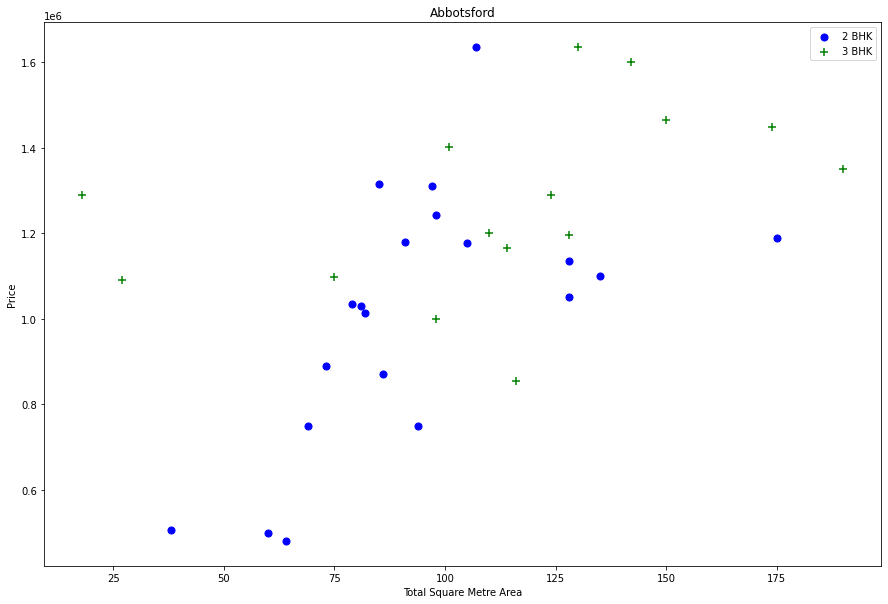

In [ ]:
def plot_scatter_chart(df,Suburb):
    bhk2 = df2[(df2.Suburb==Suburb) & (df2.Bedroom2==2)]
    bhk3 = df2[(df2.Suburb==Suburb) & (df2.Bedroom2==3)]
    #matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.BuildingArea,bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.BuildingArea,bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Metre Area")
    plt.ylabel("Price")
    plt.title(Suburb)
    plt.legend()
    
plot_scatter_chart(df2,"Abbotsford")

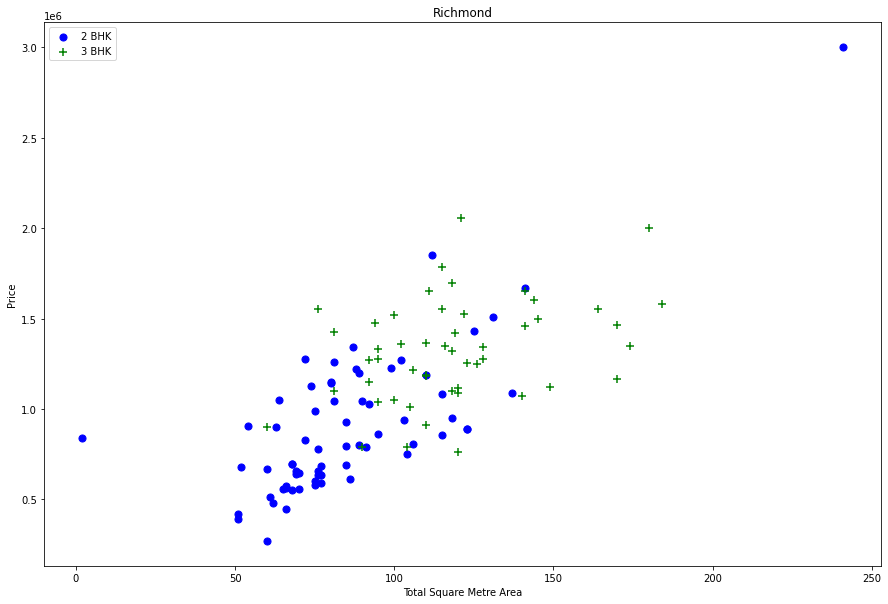

In [ ]:
plot_scatter_chart(df2,"Richmond")

Text(0, 0.5, 'Count')

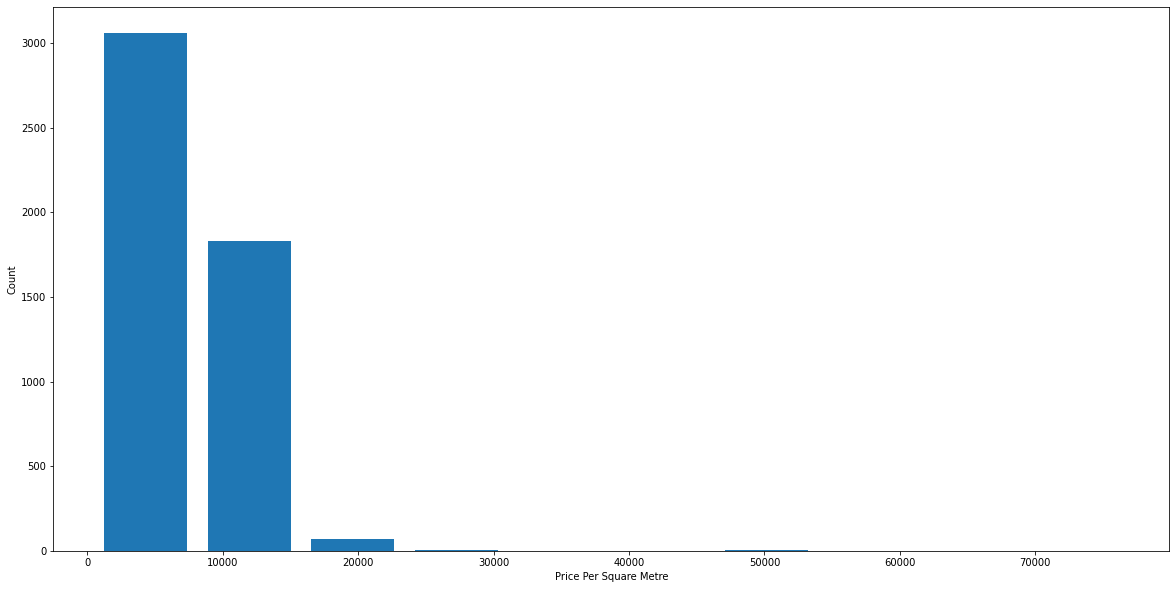

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.price_per_sqm,rwidth=0.8)
plt.xlabel("Price Per Square Metre")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

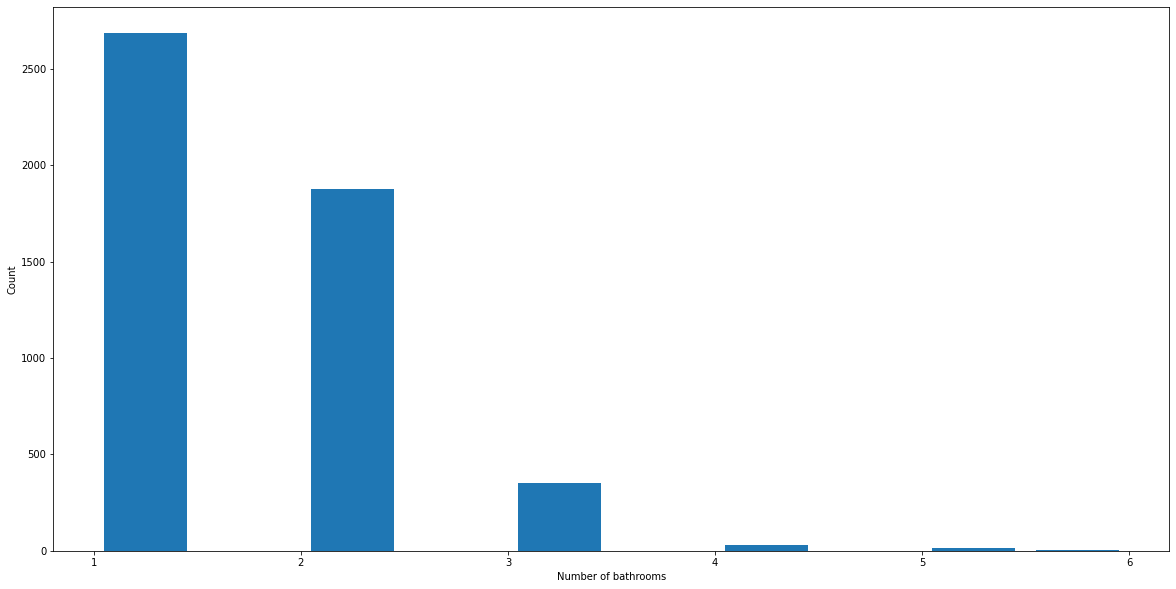

In [ ]:
plt.hist(df3.Bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df3.head()

Unnamed: 0      Suburb      Price  ...  Car  BuildingArea  price_per_sqm
0           1  Abbotsford  1035000.0  ...  0.0          79.0   13101.265823
1           2  Abbotsford  1465000.0  ...  0.0         150.0    9766.666667
2           4  Abbotsford  1600000.0  ...  2.0         142.0   11267.605634
3           6  Abbotsford  1876000.0  ...  0.0         210.0    8933.333333
4           7  Abbotsford  1636000.0  ...  2.0         107.0   15289.719626

[5 rows x 8 columns]

In [ ]:
df3.to_csv('Melb_Mean.csv')
from google.colab import files
files.download("Melb_Mean.csv")

In [ ]:
df4 = df3.drop(['price_per_sqm','Unnamed: 0'], axis = 'columns')
df4.head()

Suburb      Price  Bedroom2  Bathroom  Car  BuildingArea
0  Abbotsford  1035000.0       2.0       1.0  0.0          79.0
1  Abbotsford  1465000.0       3.0       2.0  0.0         150.0
2  Abbotsford  1600000.0       3.0       1.0  2.0         142.0
3  Abbotsford  1876000.0       4.0       2.0  0.0         210.0
4  Abbotsford  1636000.0       2.0       1.0  2.0         107.0

In [ ]:
dummies = pd.get_dummies(df4.Suburb)
dummies

Abbotsford  Aberfeldie  Airport West  ...  Windsor  Yallambie  Yarraville
0              1           0             0  ...        0          0           0
1              1           0             0  ...        0          0           0
2              1           0             0  ...        0          0           0
3              1           0             0  ...        0          0           0
4              1           0             0  ...        0          0           0
...          ...         ...           ...  ...      ...        ...         ...
4959           0           0             0  ...        0          0           1
4960           0           0             0  ...        0          0           1
4961           0           0             0  ...        0          0           1
4962           0           0             0  ...        0          0           1
4963           0           0             0  ...        0          0           1

[4964 rows x 183 columns]

In [ ]:
dummies.iloc[:, :-1]

Abbotsford  Aberfeldie  ...  Windsor  Yallambie
0              1           0  ...        0          0
1              1           0  ...        0          0
2              1           0  ...        0          0
3              1           0  ...        0          0
4              1           0  ...        0          0
...          ...         ...  ...      ...        ...
4959           0           0  ...        0          0
4960           0           0  ...        0          0
4961           0           0  ...        0          0
4962           0           0  ...        0          0
4963           0           0  ...        0          0

[4964 rows x 182 columns]

In [ ]:
df5 = pd.concat([df4.drop('Suburb', axis = 'columns' ),dummies.iloc[:, :-1]] ,axis='columns')
df5.head()

Price  Bedroom2  Bathroom  ...  Williamstown North  Windsor  Yallambie
0  1035000.0       2.0       1.0  ...                   0        0          0
1  1465000.0       3.0       2.0  ...                   0        0          0
2  1600000.0       3.0       1.0  ...                   0        0          0
3  1876000.0       4.0       2.0  ...                   0        0          0
4  1636000.0       2.0       1.0  ...                   0        0          0

[5 rows x 187 columns]

In [ ]:
df5.shape

(4964, 187)

In [ ]:
x = df5.drop('Price', axis ='columns')
x

Bedroom2  Bathroom  Car  ...  Williamstown North  Windsor  Yallambie
0          2.0       1.0  0.0  ...                   0        0          0
1          3.0       2.0  0.0  ...                   0        0          0
2          3.0       1.0  2.0  ...                   0        0          0
3          4.0       2.0  0.0  ...                   0        0          0
4          2.0       1.0  2.0  ...                   0        0          0
...        ...       ...  ...  ...                 ...      ...        ...
4959       3.0       1.0  0.0  ...                   0        0          0
4960       3.0       1.0  2.0  ...                   0        0          0
4961       3.0       1.0  1.0  ...                   0        0          0
4962       3.0       2.0  2.0  ...                   0        0          0
4963       4.0       1.0  1.0  ...                   0        0          0

[4964 rows x 186 columns]

In [ ]:
y = df5.Price
y

0       1035000.0
1       1465000.0
2       1600000.0
3       1876000.0
4       1636000.0
          ...    
4959    1100000.0
4960    1190000.0
4961    1360000.0
4962    1455000.0
4963    1285000.0
Name: Price, Length: 4964, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.694309592305612

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.69992748, 0.73190668, 0.71186212, 0.69650334, 0.68640585])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 10)
rf.fit(x, y)
rf.score(x_test, y_test)

0.954012581435162

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(RandomForestRegressor(), x, y, cv=cv)

array([0.73059661, 0.68718683, 0.70615935, 0.60092042, 0.73916941])

In [ ]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse', 'mae'],
                'splitter': ['best','random']
            }
        },
        'radnom_forest' : {
            'model': RandomForestRegressor(),
            'params': {
            'criterion' : ['mse', 'mae'],
            'n_estimators' : [10, 100, 50],
           }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)"""

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import Lasso\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.tree import DecisionTreeRegressor\n\ndef find_best_model_using_gridsearchcv(X,y):\n    algos = {\n        'linear_regression' : {\n            'model': LinearRegression(),\n            'params': {\n                'normalize': [True, False]\n            }\n        },\n        'lasso': {\n            'model': Lasso(),\n            'params': {\n                'alpha': [1,2],\n                'selection': ['random', 'cyclic']\n            }\n        },\n        'decision_tree': {\n            'model': DecisionTreeRegressor(),\n            'params': {\n                'criterion' : ['mse','friedman_mse', 'mae'],\n                'splitter': ['best','random']\n            }\n        },\n        'radnom_forest' : {\n            'model': RandomForestRegressor(),\n            'params': {\n            'criterion' : ['mse', 'mae'],\n        

In [ ]:
def predict_price(Suburb,Bedroom2,Bathroom,Car,BuildingArea):    
    loc_index = np.where(x.columns==Suburb)[0][0]

    z = np.zeros(len(x.columns))
    z[0] = Bedroom2
    z[1] = Bathroom
    z[2] = Car
    z[3] = BuildingArea
    if loc_index >= 0:
        z[loc_index] = 1

    return lr.predict([z])[0]

In [ ]:
predict_price('Abbotsford',2, 1,0,79)

	

852190.8567475517

In [ ]:
df2.Car.unique()

array([0., 2., 1., 3.])

In [ ]:
import pickle
with open('HousingPrice.pickle','wb') as f:
    pickle.dump(lr,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))